# Content and Objectives

- Show some non-coherent modulation schemes: OOK and PPM
- Show exemplary signals and depict their spectrum 

# Import

In [1]:
# importing
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib


In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=False)

matplotlib.rc('figure', figsize=(18, 8) )


# showing figures inline
%matplotlib inline

In [3]:
# set parameter for all schemes
T_pulse = 1

# samples-per-smbol
n_sps = 16 

# time vector per pulse
t_per_pulse = np.linspace( 0, T_pulse, n_sps )
t_sample =T_pulse / n_sps

# parameters of the RRC filter
# design is chosen such that interval length equals 6 sigma
sigma2 = ( T_pulse / 6. )**2
gaussian_pulse = np.exp( - ( t_per_pulse - T_pulse/2 )**2 / 2 / sigma2 )

# number of symbols within the signal
n_symb = 1000

# number of symbols shown in the time signal
n_shown = 10

# OOK

+ Shows signal and spectrum of OOK (on-off keying) 
+ Herein, binary 1 is represented as a pulse, whereas binary 0 results in no signal being transmitted

In [4]:
# set parameter for all schemes
T = T_pulse

# total time for all n_symb symbols
t_OOK_total = np.linspace( 0, ( n_symb + 1 ) * T, n_sps * n_symb )


In [5]:
# sample random bits and construct signal
b = np.random.randint( 2, size=n_symb )

In [ ]:

# construct Tx signal by filtering
s_OOK_filter = np.zeros( n_symb * n_sps )
s_OOK_filter[ :: n_sps ] = b 
s_OOK_filter = np.convolve( s_OOK_filter, gaussian_pulse )[ : n_symb * n_sps ]

# construct Tx signal by pasting the pulse in the "1"-intervals
s_OOK_copy_paste  = np.zeros( n_symb * n_sps )
for _n in range( n_symb ):
    s_OOK_copy_paste[ _n * n_sps : ( _n + 1 ) * n_sps ] += b[ _n ] * gaussian_pulse 


<Figure size 1800x800 with 0 Axes>

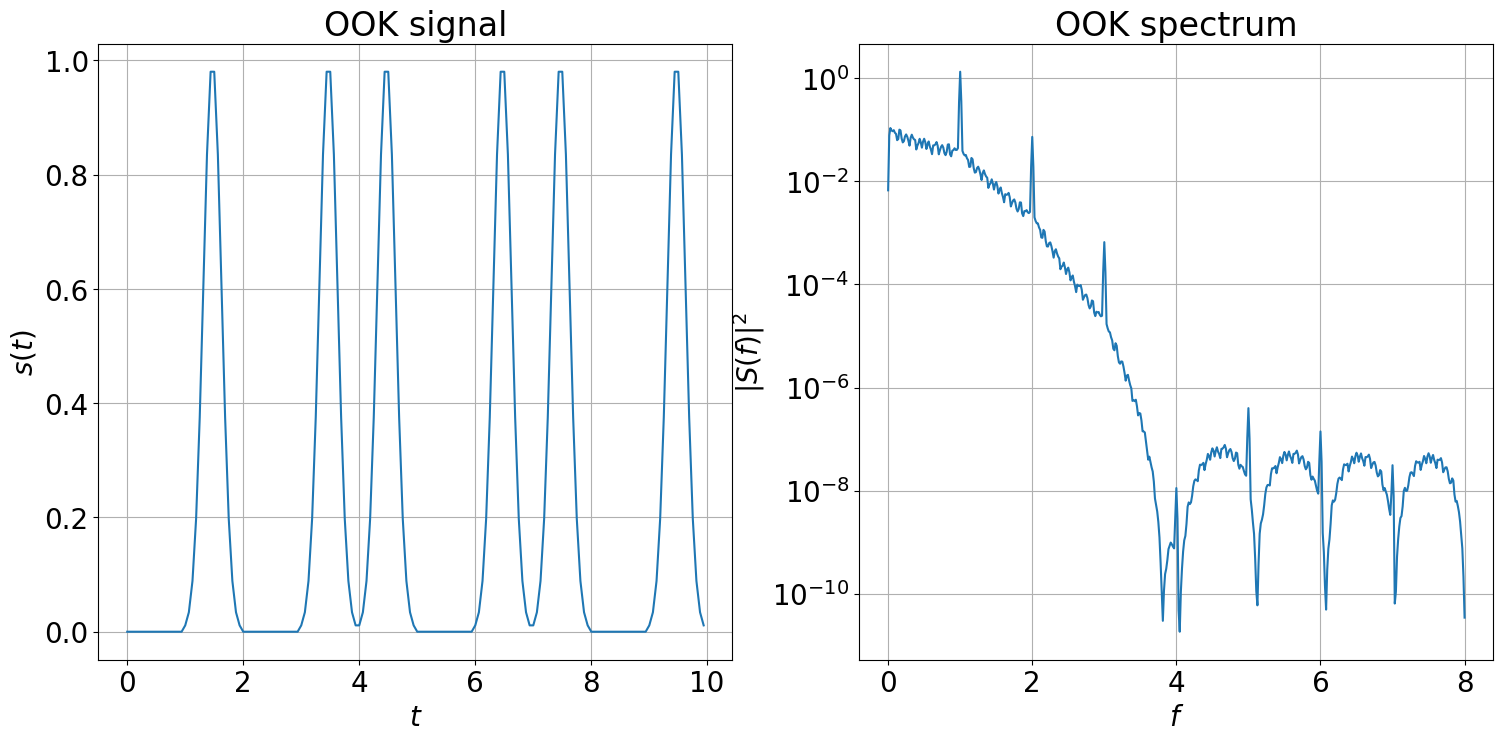

In [ ]:
plt.figure()

fig, axs = plt.subplots(1, 2)

ax = plt.subplot(121)
plt.plot( t_OOK_total[ : n_shown * n_sps ], s_OOK_filter[ : n_shown * n_sps ]  )
# you may want to activate in order to check the both methods coincide:
if 0:
    plt.plot( t_total[ : n_shown * n_sps ], s_OOK_copy_paste[ : n_shown * n_sps ], 'x'  )
plt.xlabel('$t$'); plt.ylabel('$s(t)$')
plt.grid(1); plt.title('OOK signal')

ax = plt.subplot(122)

f_OOK, S_OOK = signal.welch( s_OOK_filter, 1/t_sample, nperseg=1024 ) 
plt.semilogy( f_OOK, S_OOK, label='OOK' )

plt.xlabel('$f$'); plt.ylabel('$|S(f)|^2$')
plt.grid(1); plt.title('OOK spectrum')
plt.show()

# PPM 

+ Shows signal and spectrum of PPM (Pulse-position modulation)
+ Information is represented in the position of the pulse, a binary 0 meaning that pulse is not shifted, binary 1 resultig in puse shift

In [8]:
# number of PPM indices, log2 of which corresponds to bits
M_PPM = 2

# duration of pulse and symbol
T = T_pulse * M_PPM

# total time for all n_symb symbols
t_PPM_total = np.linspace( 0, ( n_symb + 1 ) * T, n_sps * n_symb * M_PPM )

In [9]:
# bits are not resampled, but reused from OOK

# Double length array for storing double the amount of bits
bits_padded = np.zeros(2 * len(b), dtype=int)  

# indices that will be set to "1"
# NOTE: first operation yields =0 mod 2 points/indices
# if 1 is transmitted, shift by 1 has to be done 
indices = 2 * np.arange( len( b ) ) + b 

# padd 1 at the according position
bits_padded[ indices ] = 1 

# construct signal
s_PPM_filter = np.zeros( n_symb * n_sps * M_PPM )
s_PPM_filter[ :: n_sps ] = bits_padded
s_PPM_filter = np.convolve( s_PPM_filter, gaussian_pulse )[ : n_symb * n_sps * M_PPM ]

<Figure size 1800x800 with 0 Axes>

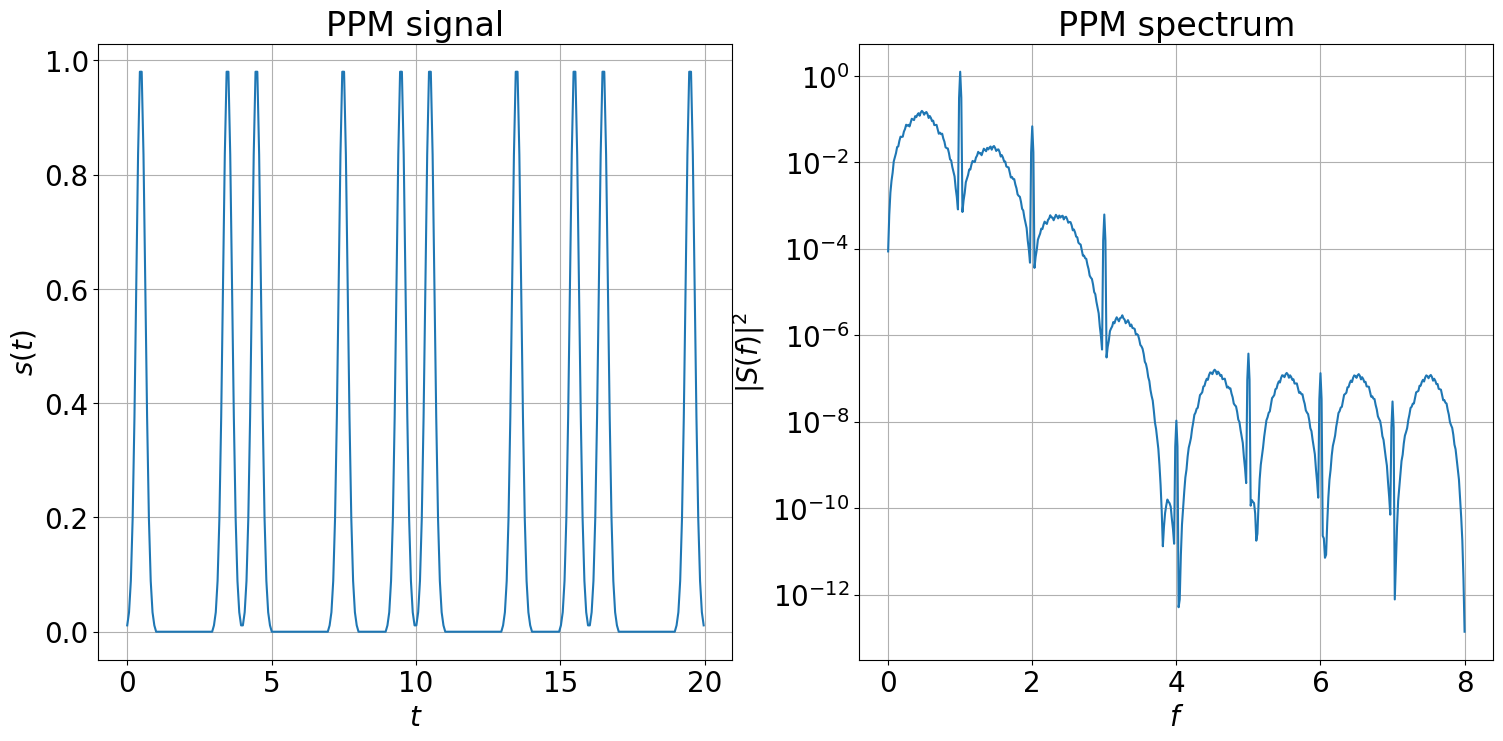

In [10]:
plt.figure()
fig, axs = plt.subplots(1, 2)

ax = plt.subplot(121)
plt.plot( t_PPM_total[ : n_shown * n_sps * M_PPM ], s_PPM_filter[ : n_shown * n_sps * M_PPM ] )
plt.xlabel('$t$'); plt.ylabel('$s(t)$')
plt.grid(1); plt.title('PPM signal')

ax = plt.subplot(122)

f_PPM, S_PPM = signal.welch( s_PPM_filter, 1/t_sample, nperseg=1024 ) 

plt.semilogy( f_PPM, S_PPM )
plt.xlabel('$f$'); plt.ylabel('$|S(f)|^2$')
plt.grid(1); plt.title('PPM spectrum')
plt.show()

# Now compare the spectra

<Figure size 1800x800 with 0 Axes>

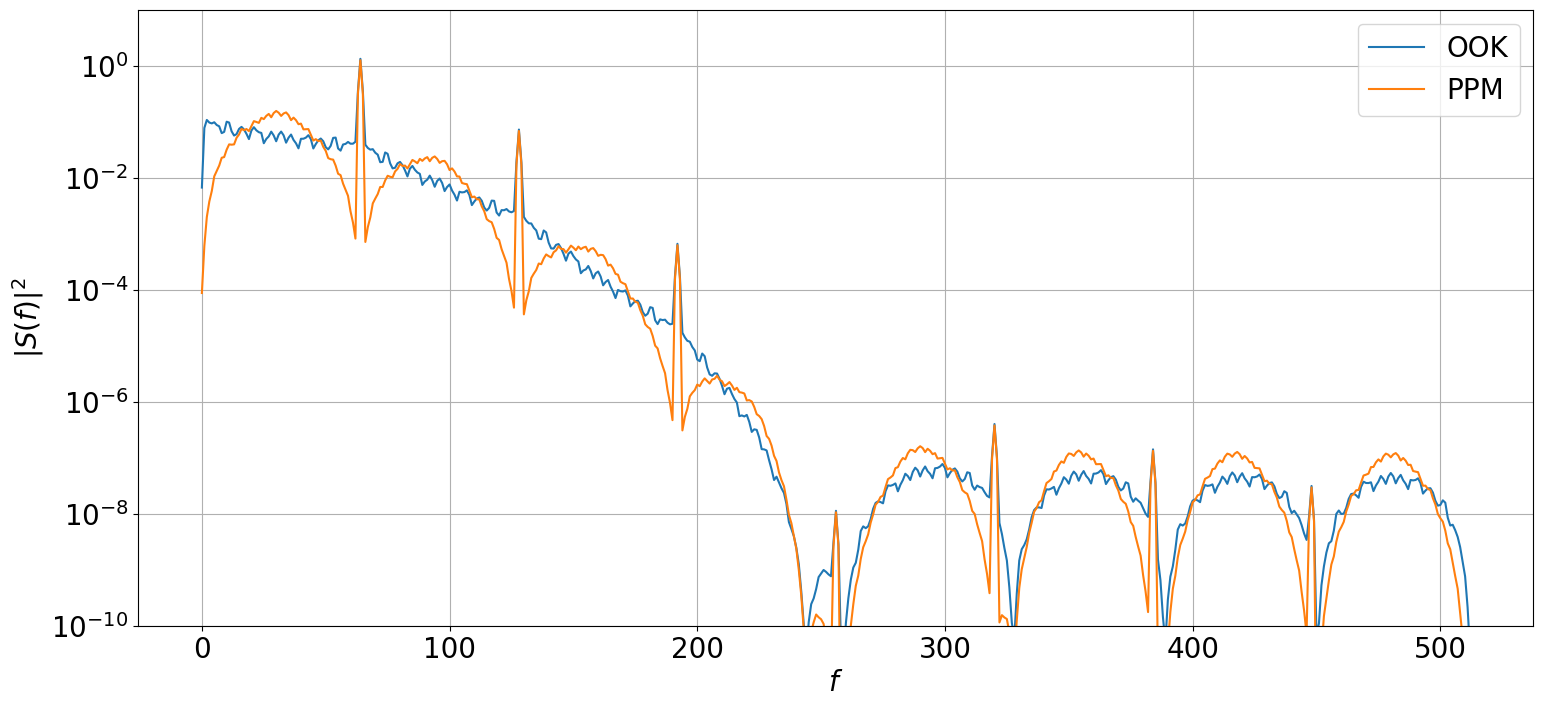

In [11]:
plt.figure()
fig, axs = plt.subplots(1, 1)


f_OOK, S_OOK = signal.welch( s_OOK_filter, 1/t_sample, nperseg=1024 ) 
plt.semilogy( S_OOK, label='OOK' )

f_PPM, S_PPM = signal.welch( s_PPM_filter, 1/t_sample, nperseg=1024 ) 
plt.semilogy( S_PPM, label='PPM' )


plt.xlabel('$f$'); plt.ylabel('$|S(f)|^2$')
plt.grid(1)
plt.ylim( (1e-10, 10))
plt.legend()

plt.show()